In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## EDA

**Realizamos un EDA para obeservar relaciones entre variables, outliers, frecuencia de palabras, analisis descriptivo, etc.**

In [2]:
movies = pd.read_csv("dataset_clean/movies.csv")

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45364 entries, 0 to 45363
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45364 non-null  int64  
 2   genres                 42981 non-null  object 
 3   id                     45364 non-null  int64  
 4   original_language      45353 non-null  object 
 5   overview               44423 non-null  object 
 6   popularity             45364 non-null  float64
 7   production_companies   33570 non-null  object 
 8   production_countries   39154 non-null  object 
 9   release_date           45364 non-null  object 
 10  revenue                45364 non-null  int64  
 11  runtime                45118 non-null  float64
 12  spoken_languages       41476 non-null  object 
 13  status                 45284 non-null  object 
 14  tagline                20396 non-null  object 
 15  ti

**Vemos si tenemos columnas con nulos**

In [4]:
movies.isna().sum()

belongs_to_collection    40876
budget                       0
genres                    2383
id                           0
original_language           11
overview                   941
popularity                   0
production_companies     11794
production_countries      6210
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3888
status                      80
tagline                  24968
title                        0
vote_average                 0
vote_count                   0
return                       0
release_year                 0
director                   835
dtype: int64

## Matriz de Correlacion

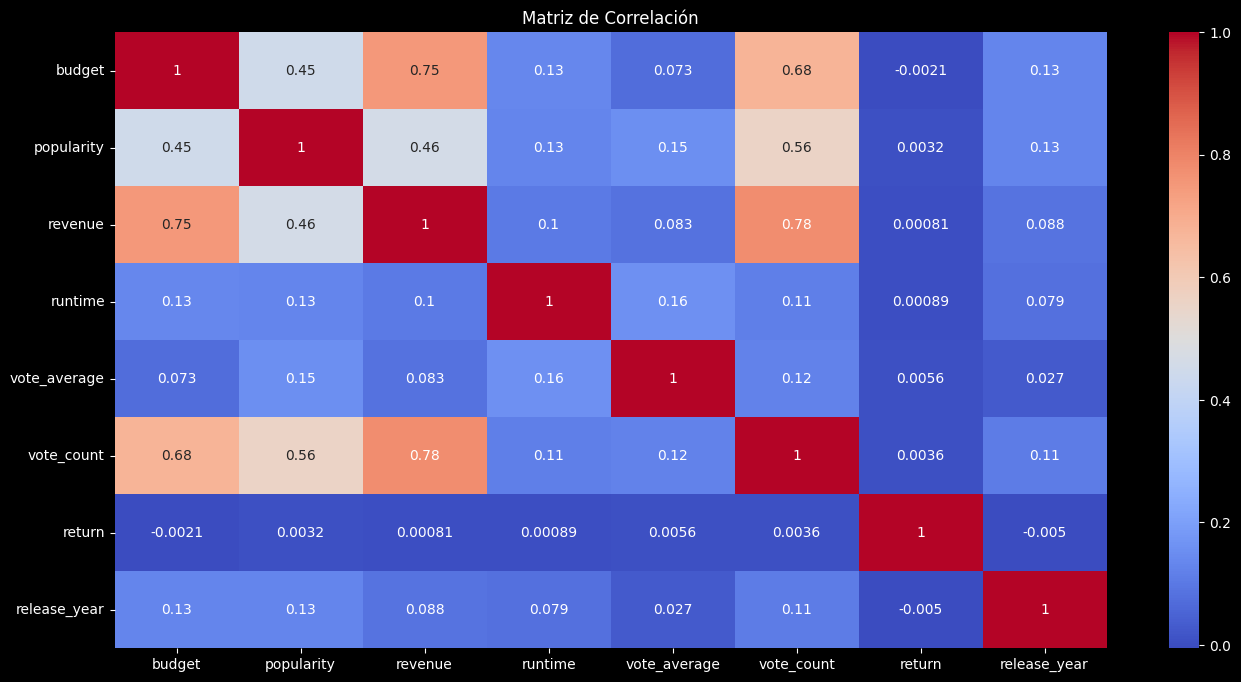

In [44]:
movies = movies.drop('id', axis = 1) # Eliminamos la columna 'id' del DataFrame 'movies'
data_num= movies.select_dtypes(exclude = ['object']) # Seleccionamos solo las columnas numéricas en el DataFrame 'movies'
data_num.head(2)

correlation_matrix = data_num.corr() # Calculamos la matriz de correlación de las variables numéricas

plt.figure(figsize=(16, 8), facecolor='black')  # Cambiamos el fondo a negro
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


**Se observan relaciones entre las variables vote_count, popularity, budget, revenue**

## Estadistica descriptivo de las variables numericas y categoricas.

In [6]:
movies[['vote_count', 'runtime', 'revenue', 'budget', 'popularity']].describe()

,vote_count,runtime,revenue,budget,popularity
count,45364.000000,45118.000000,4.536400e+04,4.536400e+04,45364.000000
mean,110.115025,94.179197,1.112426e+07,4.233702e+06,2.926446
std,491.805552,38.342387,6.387393e+07,1.744203e+07,6.010250
min,0.000000,0.000000,-2.147484e+09,0.000000e+00,0.000000
25%,3.000000,85.000000,0.000000e+00,0.000000e+00,0.388795
50%,10.000000,95.000000,0.000000e+00,0.000000e+00,1.130301
75%,34.000000,107.000000,0.000000e+00,0.000000e+00,3.691695
max,14075.000000,1256.000000,2.068224e+09,3.800000e+08,547.488298


In [7]:
movies.describe(include=object)

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,director
count,4488,42981,45353,44423,33570,39154,45364,41476,45284,20396,45364,44529
unique,1695,4064,89,44231,22666,2388,17333,1841,6,20269,42195,18829
top,The Bowery Boys,Drama,en,No overview found.,Metro-Goldwyn-Mayer (MGM),United States of America,2008-01-01,English,Released,Based on a true story.,Cinderella,John Ford
freq,29,4997,32197,133,742,17844,136,22378,44925,7,11,63


## Vemos los outliers de las variables que nos interesan mediante graficos de dispersion.

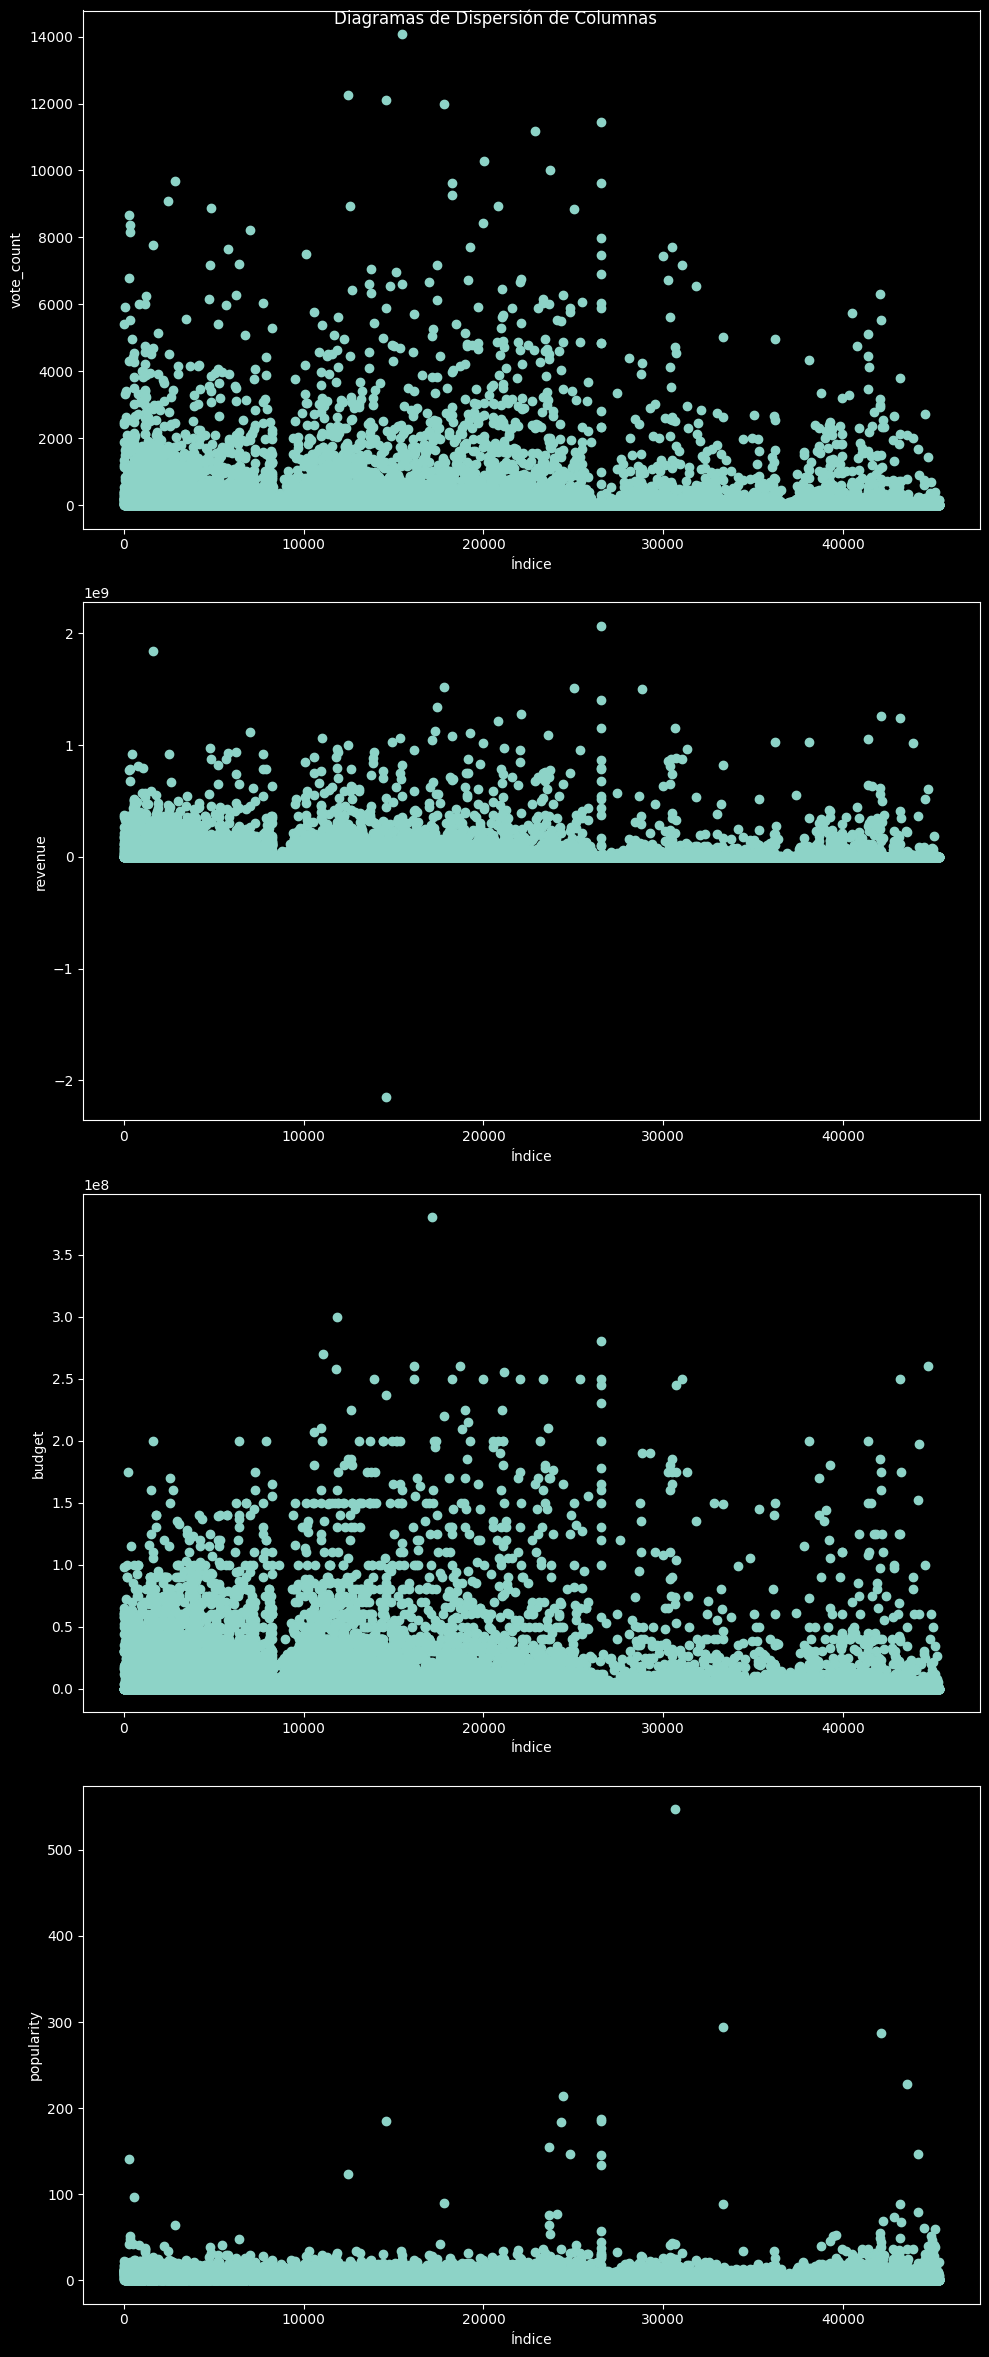

In [45]:
outliers = movies[['vote_count', 'revenue', 'budget', 'popularity']]
# Configuración de los subplots
fig, axs = plt.subplots(len(outliers.columns), figsize=(10, 6*len(outliers.columns)), facecolor='black')
fig.suptitle('Diagramas de Dispersión de Columnas', color='white')

# Generamos diagrama de dispersión para cada columna
for i, column in enumerate(outliers.columns):
    ax = axs[i]
    ax.scatter(range(len(outliers)), outliers[column])
    ax.set_xlabel('Índice')
    ax.set_ylabel(column)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

**Se observan outiers que hay que tenerlos en cuenta para un futuro analisis**

**Observamos la distribucion de la variable vote_count para ver su comportamiento**

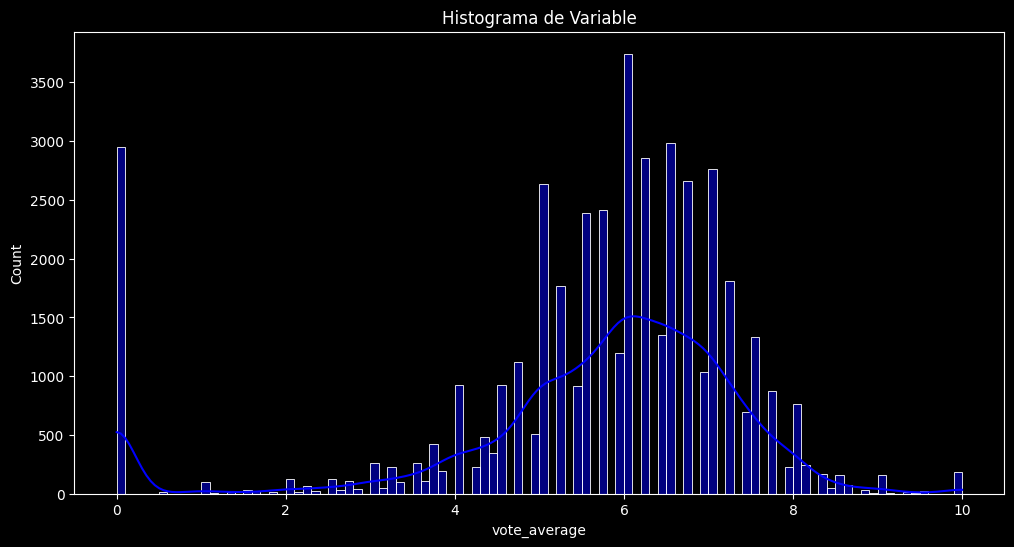

In [48]:
plt.figure(figsize=(12, 6), facecolor='black')  # Cambiamos el fondo a negro
sns.histplot(data=movies, x='vote_average', kde=True, color='blue')
plt.title('Histograma de Variable', color='white')
plt.show()

## Top 5 Países con Mayor Cantidad de Películas Estrenadas

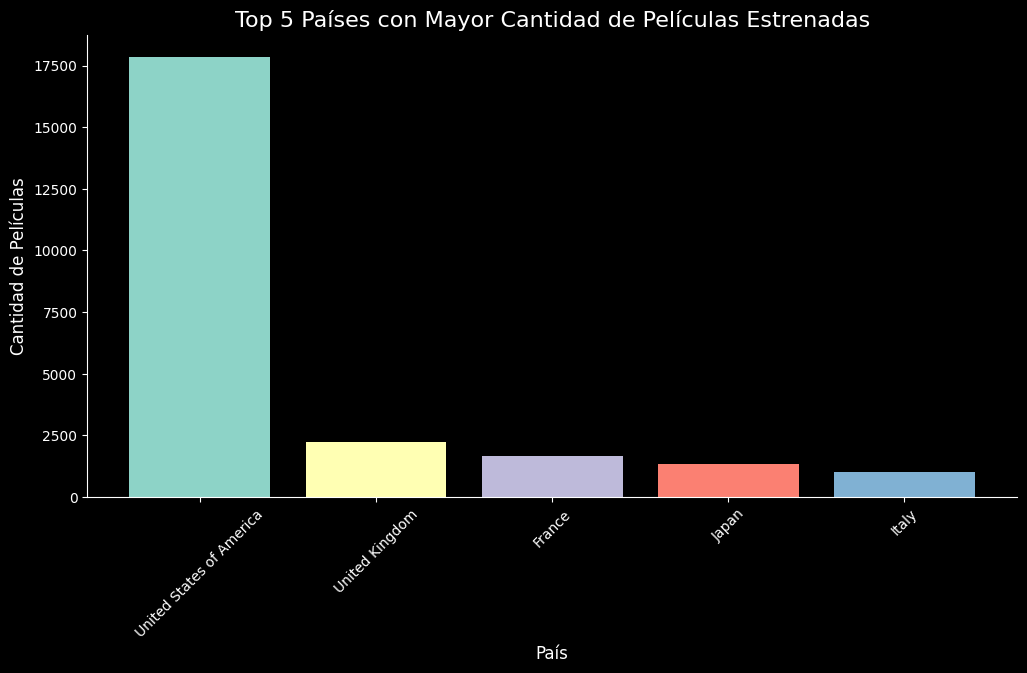

In [41]:
# Contamos la frecuencia de cada país en la columna 'pais'
paises_frecuencia = movies['production_countries'].value_counts()

# Tomamos los 5 países con mayor frecuencia
top_paises = paises_frecuencia.head(5)

# Configuramos el estilo de fondo negro
plt.style.use('dark_background')

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
colors = plt.cm.Set3.colors
plt.bar(top_paises.index, top_paises.values, color=colors)

# Personalizamos el diseño del gráfico de barras
plt.title('Top 5 Países con Mayor Cantidad de Películas Estrenadas', color='white', fontsize=16)
plt.xlabel('País', color='white', fontsize=12)
plt.ylabel('Cantidad de Películas', color='white', fontsize=12)
plt.xticks(rotation=45, color='white', fontsize=10)
plt.yticks(color='white', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')

plt.show()

## Estrenos de Peículas a lo largo del Tiempo

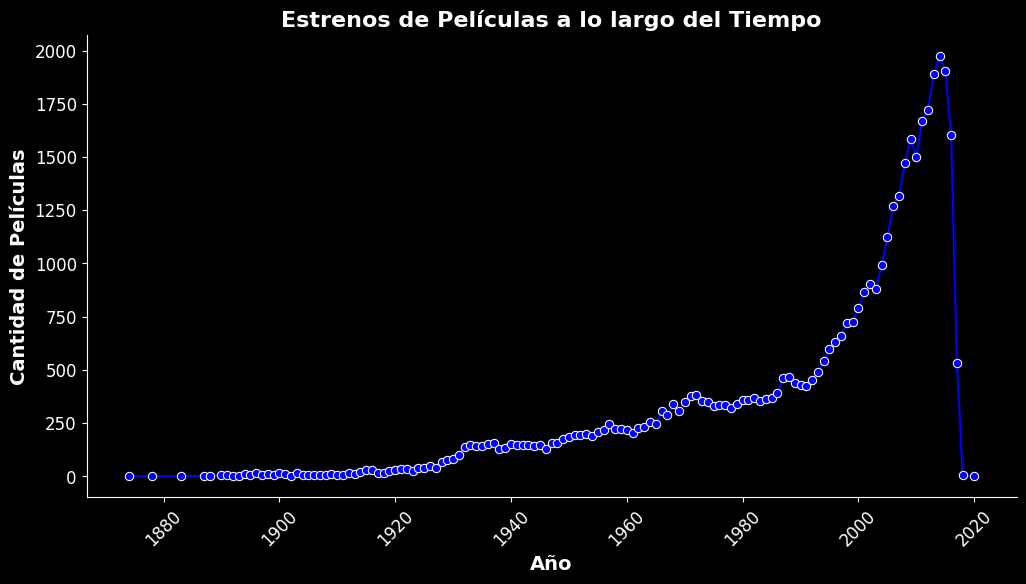

In [47]:
estrenos_por_año = movies['release_year'].value_counts().sort_index()

plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'

# Crear la línea de tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=estrenos_por_año, marker='o', color='blue')

# Personalizar el diseño de la línea de tiempo
plt.title('Estrenos de Películas a lo largo del Tiempo', color='white', fontsize=16, fontweight='bold')
plt.xlabel('Año', color='white', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Películas', color='white', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)

# Configurar el estilo de las líneas de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

plt.show()

## Distribución de Géneros de Películas

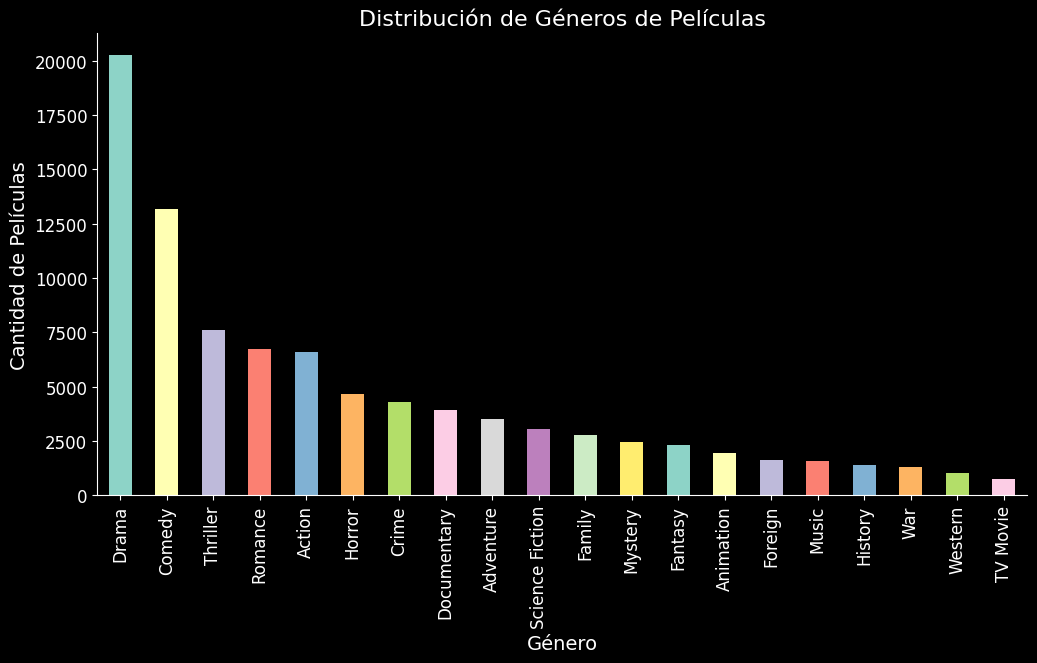

In [37]:
# Creamos una columna separada para cada género
generos_separados = movies['genres'].str.split(', ', expand=True)

# Obtenemos el conteo de cada género
conteo_generos = generos_separados.stack().value_counts()

# Establecemos el color de fondo en negro
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
conteo_generos.plot(kind='bar', color=plt.cm.Set3.colors)

# Personalizamos el diseño del gráfico de barras
plt.title('Distribución de Géneros de Películas', color='white', fontsize=16)
plt.xlabel('Género', color='white', fontsize=14)
plt.ylabel('Cantidad de Películas', color='white', fontsize=14)

# Cambiamos los colores de los ejes y las etiquetas
plt.tick_params(colors='white')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Configuramos el estilo de las líneas de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

plt.show()

## Frecuencia de palabras en los titulos

In [13]:
from nltk.corpus import stopwords
# Obtenemos el listado de stopwords del inglés
stop_words = set(stopwords.words('english'))  # Utilizamos set en lugar de list para mayor eficiencia

# Convertimos la columna de títulos en una lista
titulos = movies['title'].tolist()

from nltk.tokenize import word_tokenize
import string

tokens = []

for titulo in titulos:
    titulo = titulo.lower()  # Convertimos el texto a minúsculas
    titulo_tokens = word_tokenize(titulo)  # Tokenizamos el título en palabras
    titulo_tokens = [word for word in titulo_tokens if word.isalpha()]  # Eliminamos la puntuación
    titulo_tokens = [word for word in titulo_tokens if word not in stop_words]  # Excluimos las stopwords
    tokens.extend(titulo_tokens)  # Agregamos las palabras tokenizadas a una lista


In [14]:
# Cuenta la frecuencia de cada palabra en los títulos
from nltk.probability import FreqDist

frecuencia = FreqDist(tokens)

## Nube de palabras

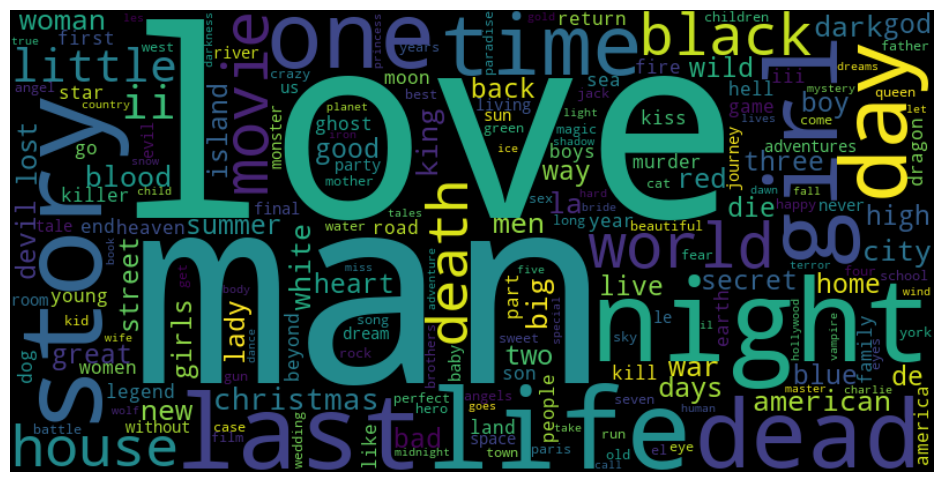

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crea un objeto WordCloud con las palabras y sus frecuencias, excluyendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate_from_frequencies(frecuencia)

# Mostramos la nube de palabras en un gráfico
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Se observa que las palabras con mas frecuencia son: love, man, story, world, life, night, last**

## Transformacion para el sistema de recomendacion.

**Decidimos usar para el modelo las columnas 'title', 'vote_average' y 'genres'**  
**Por un tema de memoria, vamos a usar solamente las primeras 5000 filas**

In [3]:
moviesML = movies.dropna(subset=["genres"], inplace=True) # Borramos los nulos de la columna 'genres'

In [4]:
moviesML = movies.head(5000)

In [5]:
moviesML = movies[['title', 'vote_average', 'genres']]

In [6]:
moviesML.isna().sum()

title           0
vote_average    0
genres          0
dtype: int64

In [ ]:
moviesML = moviesML.to_csv('moviesML.csv', index=False)